- Install touchstone. get config file and import required modules

In [55]:
!pip3 install git+https://github.com/Ayesha279/benchmark-comparison.git@multiRecord_touchstone
!curl -LO https://raw.githubusercontent.com/Ayesha279/benchmark-comparison/multiRecord_touchstone/config/ocm-requests.json
    
from touchstone.benchmarks.generic import Benchmark
from touchstone import decision_maker
from touchstone import databases
from tabulate import tabulate
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt



  Cloning https://github.com/Ayesha279/benchmark-comparison.git (to revision multiRecord_touchstone) to /tmp/pip-req-build-yaeexc46
  Running command git clone -q https://github.com/Ayesha279/benchmark-comparison.git /tmp/pip-req-build-yaeexc46
  Running command git checkout -b multiRecord_touchstone --track origin/multiRecord_touchstone
  Switched to a new branch 'multiRecord_touchstone'
  Branch 'multiRecord_touchstone' set up to track remote branch 'multiRecord_touchstone' from 'origin'.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   254  100   254    0     0   1032      0 --:--:-- --:--:-- --:--:--  1036


- Set touchstone paramters

In [84]:
uuid="aeed6306-b7e1-11eb-b313-e86a640406b2"
uuid2="1bf34d07-b3ef-4f57-a612-234c3f2d4ba1"
database="elasticsearch"
es_index = "ocm-requests"
es_url="https://search-perfscale-dev-chmf5l4sh66lvxbnadi4bznl3a.us-west-2.es.amazonaws.com"
benchmark=Benchmark(open("ocm-requests.json"), database)

- Connect to database - ElasticSearch

In [77]:
database_instance = databases.grab(database, conn_url = es_url)

Iterate the indexes from the config file and get timeseries results from each one of them

In [85]:
document_list = []  
for compute in benchmark.compute_map['ocm-requests'] :
    print("Getting results")
    timeseries_result1 = database_instance.get_timeseries_results(uuid=uuid, 
                                                                 compute_map = compute,
                                                                 index = es_index,
                                                                 identifier="uuid"
                                                                )
    
df = pd.DataFrame(timeseries_result1)

for compute in benchmark.compute_map['ocm-requests'] :
    print("Getting results")
    timeseries_result2 = database_instance.get_timeseries_results(uuid=uuid2, 
                                                                 compute_map = compute,
                                                                 index = es_index,
                                                                 identifier="uuid"
                                                                )
dff = pd.DataFrame(timeseries_result2)

Getting results
Getting results
               test_name                                  uuid  \
0      self-terms-review  1bf34d07-b3ef-4f57-a612-234c3f2d4ba1   
1      self-terms-review  1bf34d07-b3ef-4f57-a612-234c3f2d4ba1   
2      self-terms-review  1bf34d07-b3ef-4f57-a612-234c3f2d4ba1   
3      self-terms-review  1bf34d07-b3ef-4f57-a612-234c3f2d4ba1   
4      self-terms-review  1bf34d07-b3ef-4f57-a612-234c3f2d4ba1   
...                  ...                                   ...   
53995  self-terms-review  1bf34d07-b3ef-4f57-a612-234c3f2d4ba1   
53996  self-terms-review  1bf34d07-b3ef-4f57-a612-234c3f2d4ba1   
53997  self-terms-review  1bf34d07-b3ef-4f57-a612-234c3f2d4ba1   
53998  self-terms-review  1bf34d07-b3ef-4f57-a612-234c3f2d4ba1   
53999  self-terms-review  1bf34d07-b3ef-4f57-a612-234c3f2d4ba1   

                            timestamp  code method  \
0      2021-07-07T14:31:13.673473779Z   200   POST   
1      2021-07-07T14:31:13.907361266Z   200   POST   
2      2021-0

- Plot results

Text(0.5, 0.98, 'Latency comparision')

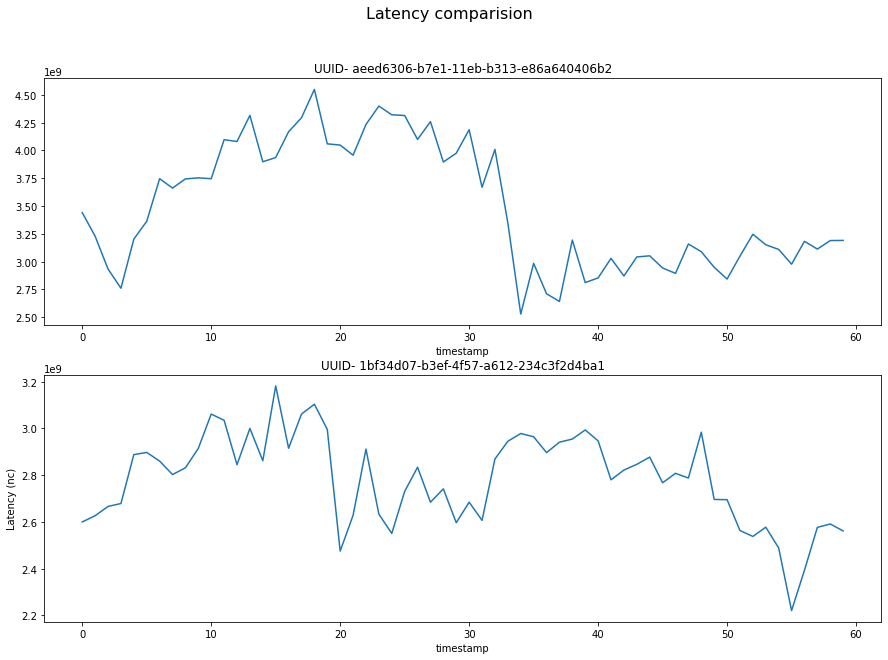

In [93]:
fig, axs = plt.subplots(2,figsize=(15, 10))
plt.title('Latency comparision')
plt.ylabel('Latency (ns)')
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.groupby(df["timestamp"].dt.second)["latency_ns"].mean().plot(rot=0, ax=axs[0])

plt.ylabel('Latency (nc)')
dff["timestamp"] = pd.to_datetime(dff["timestamp"])
dff.groupby(dff["timestamp"].dt.second)["latency_ns"].mean().plot(rot=0, ax=axs[1])


axs[0].title.set_text('UUID- aeed6306-b7e1-11eb-b313-e86a640406b2')
axs[1].title.set_text('UUID- 1bf34d07-b3ef-4f57-a612-234c3f2d4ba1')
fig.suptitle('Latency comparision', fontsize=16)

Text(0, 0.5, 'Latency (ns)')

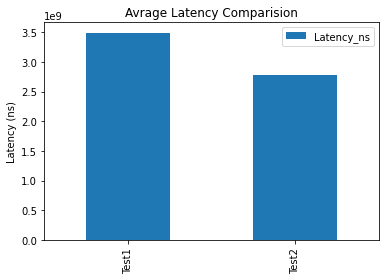

In [118]:

Test1=df["latency_ns"].mean()
Test2=dff['latency_ns'].mean()

plotdata = pd.DataFrame(
    {"Latency_ns": [Test1, Test2]}, 
    index=["Test1", "Test2"])

plotdata.plot(kind="bar")
plt.title('Avrage Latency Comparision')
plt.ylabel('Latency (ns)')